In [302]:
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from keras.models import Model
import numpy as np 
import pandas as pd 
from subprocess import check_output
#print(check_output(["ls", "../input/"]))
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures
from os.path import join as opj
from matplotlib import pyplot as plt
import tensorflow as tf
import os
%matplotlib inline

In [2]:
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Input, Flatten, Activation,Add, ZeroPadding2D ,AveragePooling2D
from keras.layers import GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.merge import Concatenate
from keras.models import Model
from keras import initializers,regularizers
from keras.optimizers import Adam,SGD
from keras.initializers import glorot_uniform
from keras.callbacks import ModelCheckpoint, Callback, EarlyStopping
from keras.preprocessing.image import ImageDataGenerator
import keras.backend as K
K.set_image_data_format('channels_last')
#K.set_learning_phase(1)

In [209]:
train = pd.read_json("input/train.json")

In [280]:
angle_nona = train[train['inc_angle']!='na']
angle_nona = angle_nona.reset_index()
only_band1 = ['band1_'+str(i) for i in range(75*75)]
only_band2 = ['band2_'+str(i) for i in range(75*75)]
both_bands = only_band1+only_band2
df = pd.concat([pd.DataFrame(angle_nona['band_1'].values.tolist(),columns = only_band1),
                pd.DataFrame(angle_nona['band_2'].values.tolist(),columns = only_band2)],axis = 1)

In [281]:
df['b1_median'] = np.median(df[only_band1],axis = 1)
df['b2_median'] = np.median(df[only_band2],axis = 1)
df['b1_mean'] = np.mean(df[only_band1],axis = 1)
df['b2_mean'] = np.mean(df[only_band2],axis = 1)
df['b1_max'] = np.max(df[only_band1],axis = 1)
df['b2_max'] = np.max(df[only_band2],axis = 1)
df['b1_min'] = np.median(df[only_band1],axis = 1)
df['b2_min'] = np.median(df[only_band2],axis = 1)
df['b1_std'] = np.std(df[only_band1],axis = 1)
df['b2_std'] = np.std(df[only_band2],axis = 1)
stats = df.columns[-10:]
df['inc_angle'] = angle_nona['inc_angle']

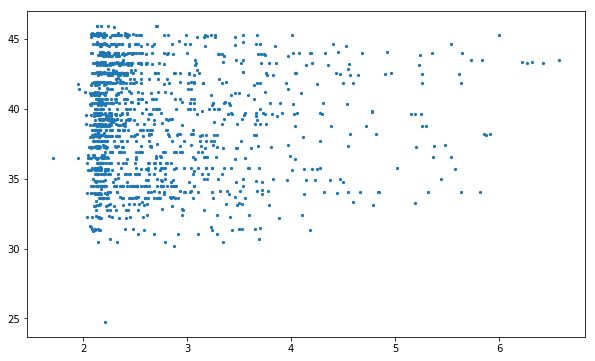

In [176]:
plt.figure(figsize = (10,6))
plt.scatter(df['b2_std'],angle_nona['inc_angle'],s = 5)

In [284]:

def model_compare(random_state,first_with = None,second_with = None):
    X1 = df[first_with].values
    X2 = df[second_with].values
    y = df['inc_angle']
    X_train1,X_valid1,X_train2,X_valid2,y_train,y_valid = train_test_split(X1,X2,y,train_size = 0.8,random_state = random_state)
    lr1 = LinearRegression().fit(X_train1,y_train)
    lr2 = LinearRegression().fit(X_train2,y_train)
    score1 = lr1.score(X_valid1,y_valid)
    score2 = lr2.score(X_valid2,y_valid)
    pred1 = lr1.predict(X_valid1)
    pred2 = lr2.predict(X_valid2)
    mas1 = mean_absolute_error(y_valid,pred1)
    mas2 = mean_absolute_error(y_valid,pred2)
    return [score1,score2],[mas1,mas2]
    

In [292]:
r = model_compare(0,both_bands,stats)

c:\users\yltbe\anaconda3\envs\tensorflow_gpu\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [295]:
R = []
MAS = []
for i in range(20):
    r,mas = model_compare(i,both_bands,stats)
    R.append(r)
    MAS.append(mas)
print(np.array(R))
print(np.array(MAS))

c:\users\yltbe\anaconda3\envs\tensorflow_gpu\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


[[ 0.16711414  0.25713335]
 [ 0.28506899  0.38805816]
 [ 0.16122991  0.31706507]
 [ 0.2136849   0.34119262]
 [ 0.17927406  0.32880019]
 [ 0.37993439  0.43919714]
 [ 0.26659529  0.35045972]
 [ 0.17799142  0.2753711 ]
 [ 0.2037262   0.31920404]
 [ 0.2700839   0.34875797]
 [ 0.20394658  0.27582887]
 [ 0.2121844   0.34139292]
 [ 0.27184582  0.38562091]
 [ 0.23031677  0.40882932]
 [ 0.28416511  0.40230163]
 [ 0.31455758  0.32290607]
 [ 0.27987814  0.3138355 ]
 [ 0.21308588  0.38243169]
 [ 0.27217076  0.33545376]
 [ 0.09268523  0.2743837 ]]
[[ 2.61196862  2.43631311]
 [ 2.43915698  2.28797128]
 [ 2.76010883  2.38592655]
 [ 2.53467704  2.23265073]
 [ 2.62649611  2.39745591]
 [ 2.44947295  2.3662902 ]
 [ 2.44760779  2.26793296]
 [ 2.69766296  2.47970531]
 [ 2.70796441  2.52121576]
 [ 2.62440437  2.46694831]
 [ 2.62090194  2.43373975]
 [ 2.55382691  2.32075558]
 [ 2.62369427  2.40408773]
 [ 2.73162751  2.37898467]
 [ 2.55607031  2.31388751]
 [ 2.45630006  2.38417951]
 [ 2.66363519  2.61386252]


In [301]:
np.argmin(np.array(R),axis = 1)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)